# Hidden point removal

Imagine you want to render a point cloud from a given view point, but points from the background leak into the foreground because they are not occluded by other points. For this purpose we can apply a hidden point removal algorithm. In Open3D the method by [Katz2007] is implemented that approximates the visibility of a point cloud from a given view without surface reconstruction or normal estimation.

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import sys
# only needed for tutorial, monkey patches visualization
sys.path.append (' ..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

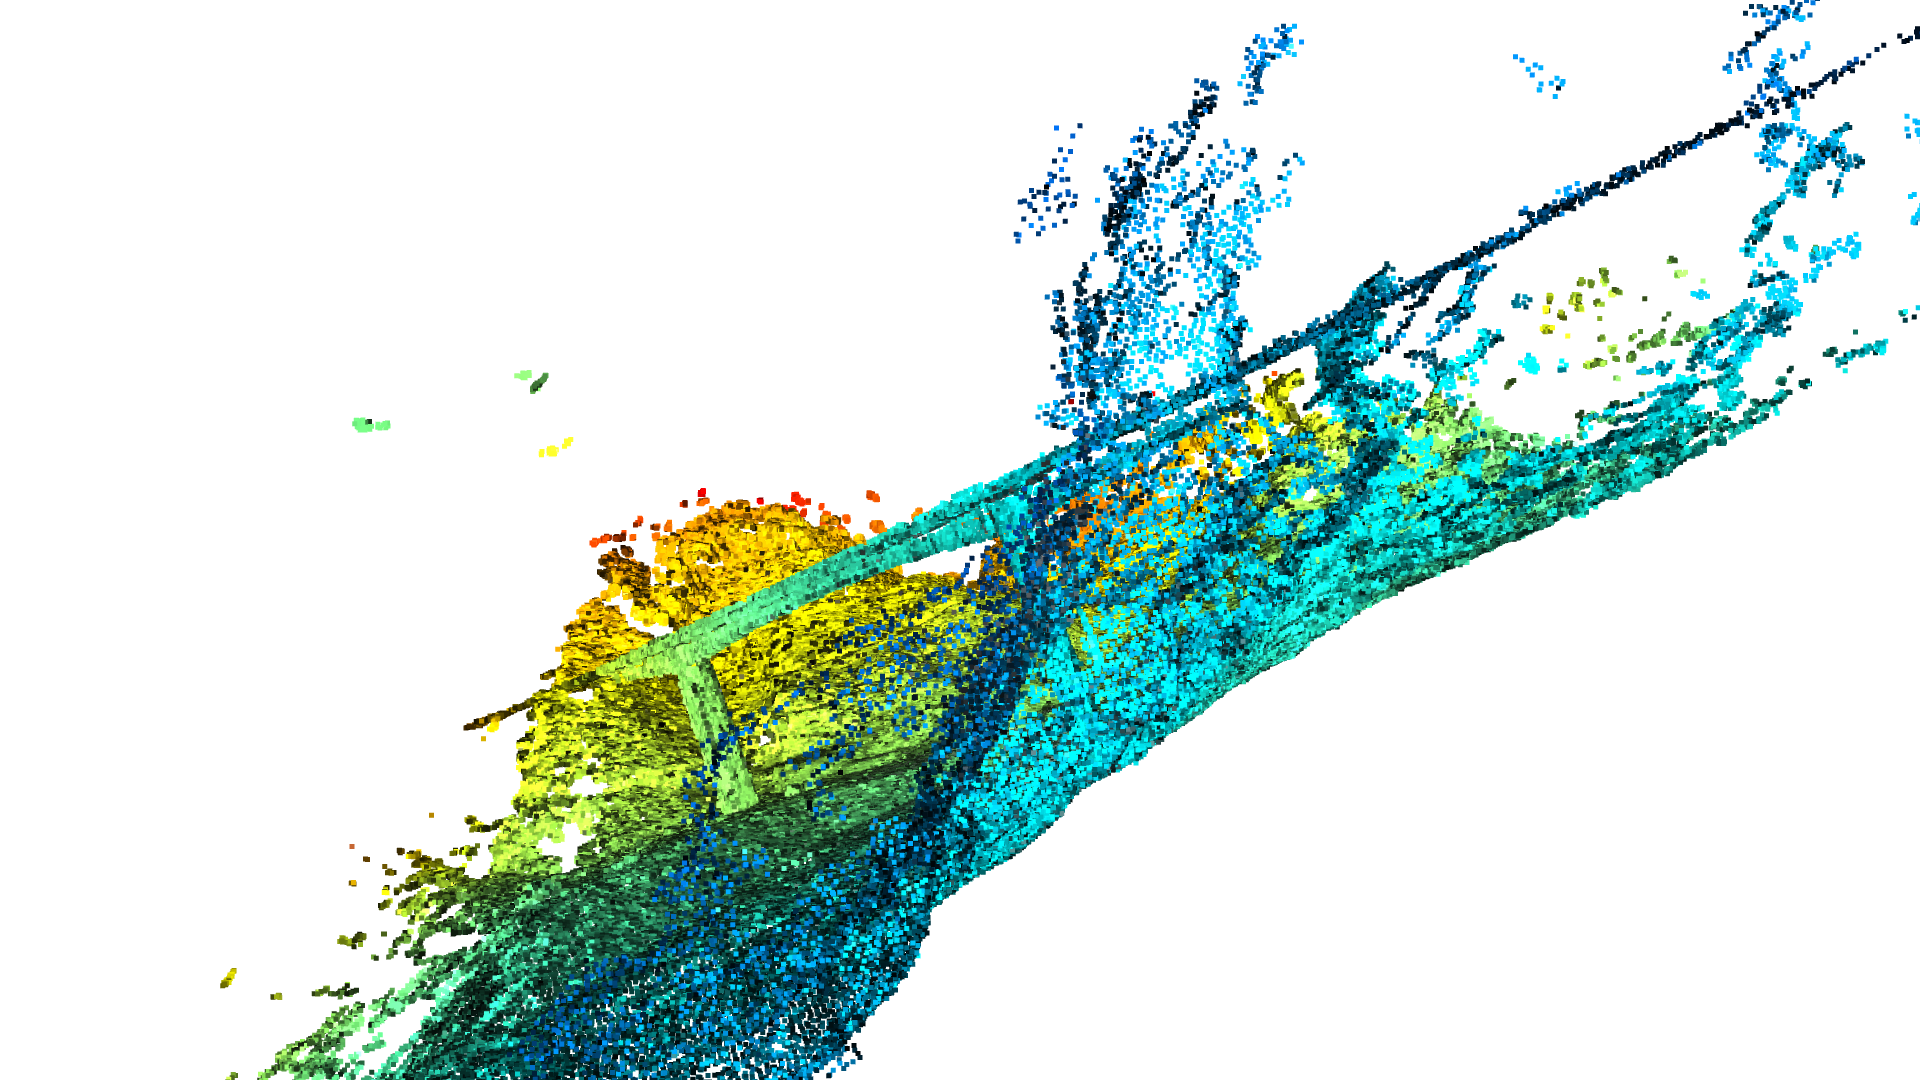

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


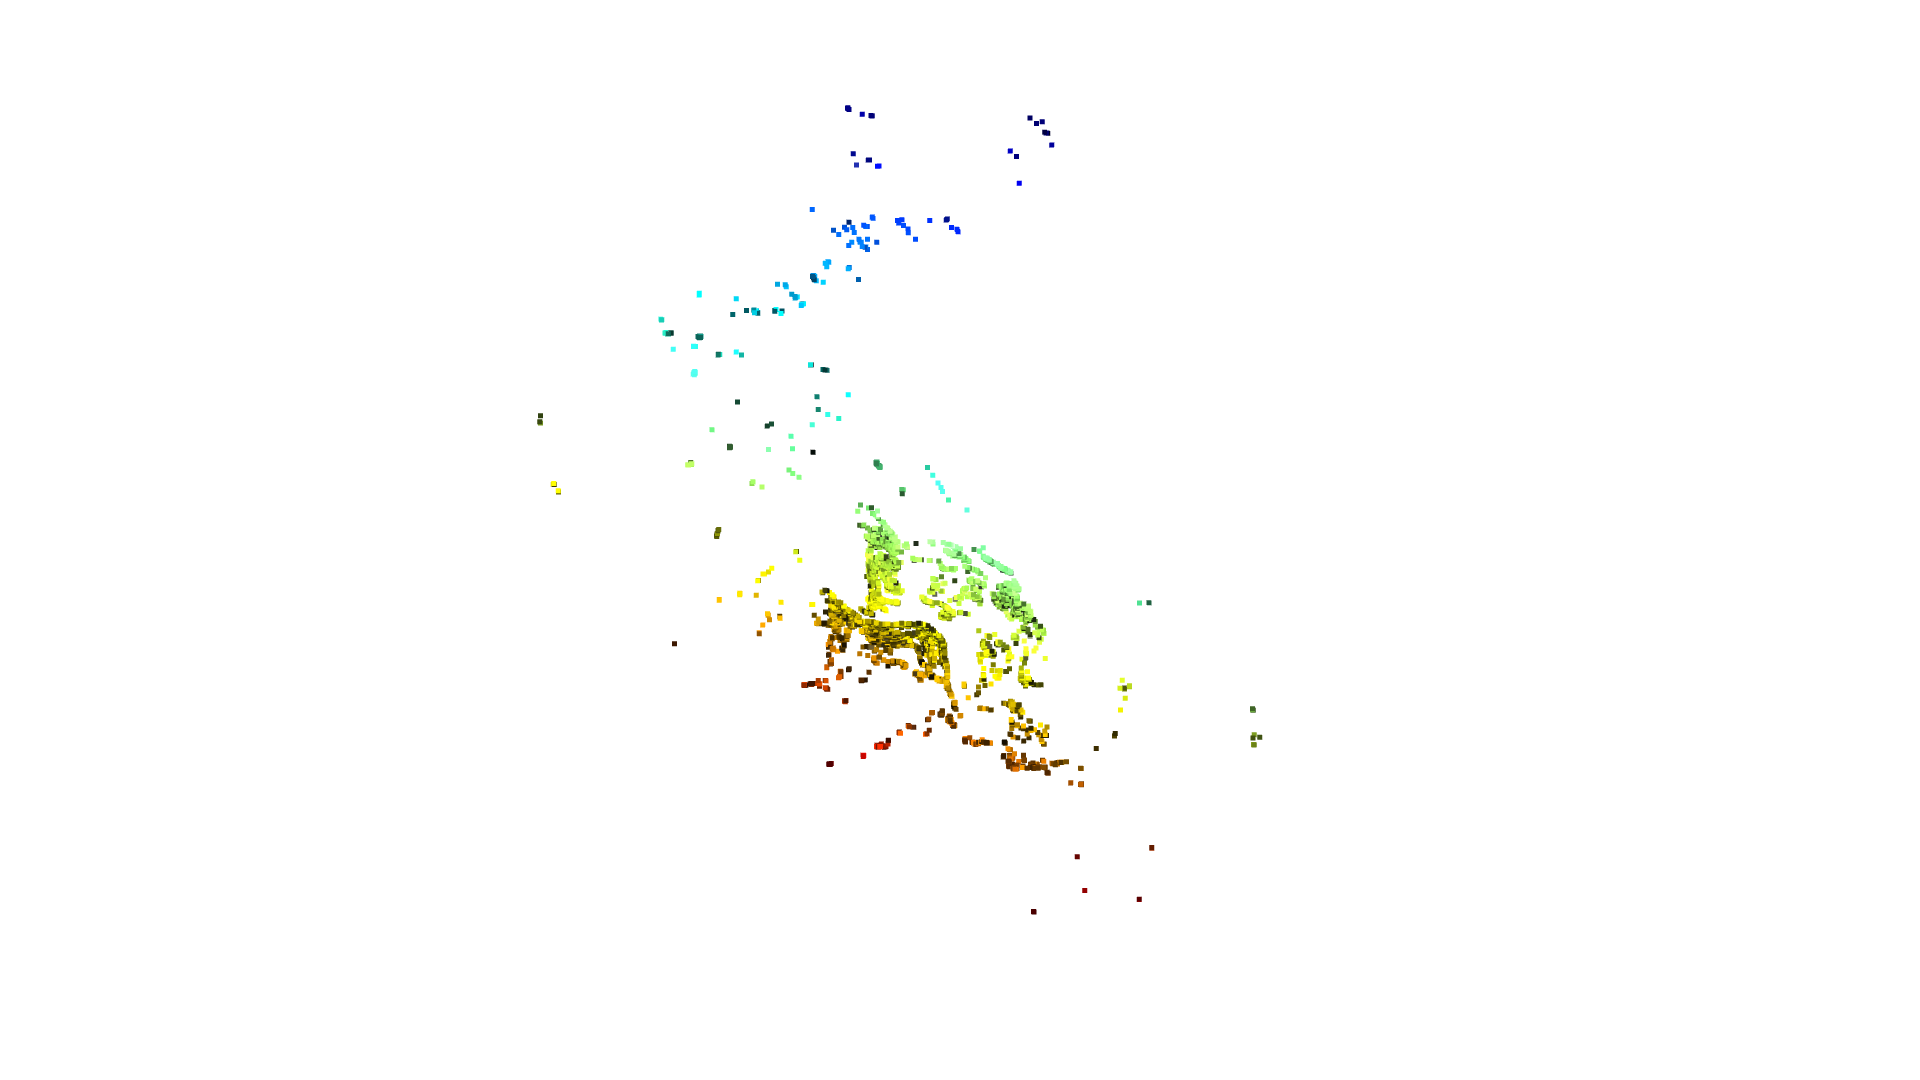

In [3]:
pcd = o3d.io.read_point_cloud("./filtered_point_cloud.ply")

diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd])